Cristina Cicali, Clelia Corridori, Anna Steffinlongo
# Lyapunov Exponent and Out-of-Time-Ordered Correlator’s Growth Rate

In [1]:
#Call of all the libreries needed in the computation. 
from numpy import *
import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import random as rand
from OTOCfunc import *
from CGR_LYAPfunc import *

### Computation of the OTOC

In [2]:
#Parameters to compute the Out-Of-Time-Correlator OTOC for different values of K
#N are the number of steps chosen for the computation. 
# T is the period of the kicks  
# K are the different values of the kicking strength, which in this case are computed using the intrinsic function
# of python logspace. In this way we took 50 point between -2,2
# Nkicks is the number of kicks.

# To reduce the oscillation of the OTOC for small values of K we have introduced a mean over a number of trials
#chosen in input with the variable "trials_OTOC". Moreover it is introduced another variable 'trials' to meadiated
#the correlator growth rate.

N=2**14
T=2**-7
trials_OTOC=10
trials=1
K=logspace(-2,2,50)
Nkicks=30
Kick=arange(1,Nkicks+1,1)

# mean_C=zeros([Nkicks,len(K),trials])
# for kk in range(trials):
    # mean_C[:,:,kk]=mean_otoc(N,T,K,Nkicks,trials_OTOC,False)
mean_C=mean_otoc(N,T,K,Nkicks,trials_OTOC,False)


Trial # 0
Trial # 1
Trial # 2
Trial # 3
Trial # 4
Trial # 5
Trial # 6
Trial # 7
Trial # 8
Trial # 9


In [3]:
#Due to the time needed for the computation of the OTOC we saved the data in a txt file in order to only load
#the file when needed
saveF=True
if saveF==True:
    with open('OTOC_10trials_noMean-FigEXP.txt', 'w') as out:
        for line in mean_C:
            savetxt(out, line)


In [3]:
# to load data
load=True
if load==True:
    # The value selected here must be the same of the quantities above chosen for the saved file!
    N=2**14
    T=2**-7
    trials=10
    K=logspace(-2,2,50)
    Nkicks=30
    Kick=arange(1,Nkicks+1,1)

    data = loadtxt("OTOC_10trials_noMean-FigEXP.txt", comments="#", delimiter=" ", unpack=False)
    mean_C=reshape(data.astype(float),(Nkicks,len(K),trials))

### Quantum CGR

In [4]:
#Computation of the correlator growth rate using the function quantumCGR_fit contained in the file CGR_LYAPfunc.py
CGR_Q=quantumCGR_fit(Kick, K, mean_C)


C:\Users\cleli\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


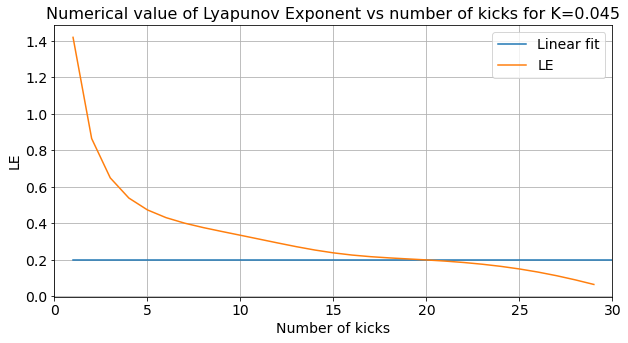

In [5]:
#Plot of an example of the method previous used. We plot the numerical value of the lyapunov exponent for 
#the value of K=0.045 as function of the number of kicks and also the linear fit used to individuate the point in which the quantum CGR is constat 
#which correspond to the value of the growth exponent.
k_sel=7
lyap_num=quantumCGR_num(mean_C[:,k_sel],Kick)

plt.figure(figsize=(10,5))
plt.plot(Kick,ones(len(Kick))*CGR_Q[k_sel]*2, label='Linear fit')
plt.plot(Kick[:-1],lyap_num,label='LE')
plt.legend(loc='upper right', fontsize='14')
plt.xlim([0,30])
plt.xlabel('Number of kicks', size=14)
plt.ylabel('LE', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Numerical value of Lyapunov Exponent vs number of kicks for K=0.045', size=16)
plt.grid()
plt.savefig('Q_CGR_K0045.png', dpi=100)

### Classical LE numerically computed

In [7]:
#Computation of the classical Lyapunov exponent.
#P is number of steps in which we compute the evolution 
#Chosen a number of kiks also in this case we set a number of trials on mediate the value of the lyapunov exponent.
#dxi and dpi are the displacement from the initial condition needed to compute the evolution. 
#The initial values are choosen between 0 and 2*pi in random way, and this procedure is done for a number 
#of times chosen from the variable trials. Then using the function 'evoluz' contained in the LYAPfunc.py file 
# we have computed the time evolution, and then the lyapunov exponent using the function 'lyapFunc' always 
#contained in the same file.

P=100
Nkicks=50 
trials=100
dxi=10**(-10)
dpi=10**(-10)
lyap_t=zeros([len(K),trials])
lyapCL=zeros(len(K))
for kk in range(0,len(K)):
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        nd = evoluz(P, x_i, p_i, dxi, dpi, Nkicks, K[kk])
        lyap_t[kk,ii] = lyapFunc(P,Nkicks,nd)
    lyapCL[kk]=sum(lyap_t[kk,:])/trials


### Classical CGR numerically computed

In [8]:
#Computation of the classical Correlator growth rate. We have choosen also in this case a number of kicks and
#a number of trials on mediate. Also in this we choose a displacement and the initial conditions from a random 
#uniform distribution between 0 and 2*pi. The classical CGR is computed following the equation ????????.

Nkicks=70
trials=1000
dxi=10**(-12)
dpi=10**(-12)

CGR_c=zeros(len(K))
for kk in range(0,len(K)):
    dp2=zeros([Nkicks,trials])
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        dp2[:,ii] = map_kr_CGR(x_i, p_i, dxi, dpi, Nkicks, K[kk])
    dp2mean=mean(dp2,1)
    
    dp2meanShift=insert(dp2mean, 0, 0)
    dp2meanShift=delete(dp2meanShift, -1)

    ratio= log(dp2mean[2:]/dp2meanShift[2:])
    
    CGR_c[kk]=(1/(2*(Nkicks-1)))*sum(ratio)


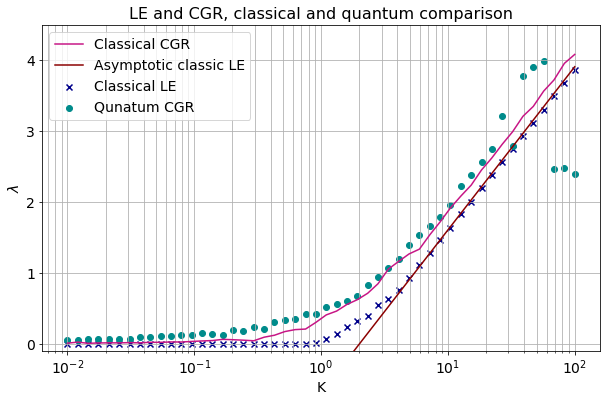

In [9]:
plt.figure(figsize=(10,6))
plt.xscale('log')

# Classical LE
plt.scatter(K,lyapCL,marker='x',label='Classical LE', color='darkblue')

# Classical CGR
plt.plot(K, CGR_c, label='Classical CGR',color='mediumvioletred')

# classical LE analytical behaviour for large K
plt.plot(K,log(K/2), label='Asymptotic classic LE', color='darkred')

# Quantum CGR
plt.scatter(K[:],CGR_Q[:], label='Qunatum CGR', color='darkcyan')

plt.legend(fontsize=14)
plt.ylim([-0.1,4.5])
plt.xlabel('K', size=14)
plt.ylabel('$\lambda$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('LE and CGR, classical and quantum comparison',size=16)
plt.grid(True, which="both")
plt.savefig('CGRandLE.png', dpi=100)

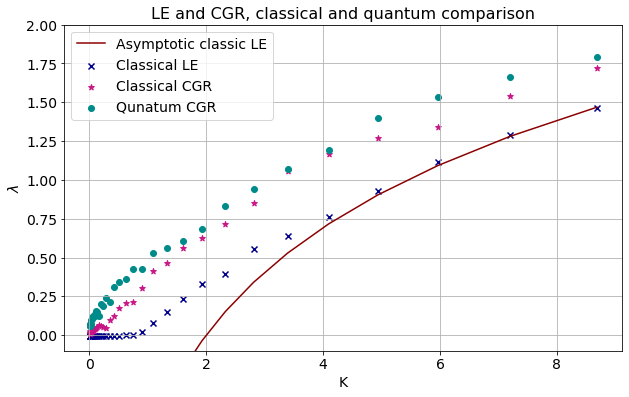

In [10]:
plt.figure(figsize=(10,6))

# Classical LE
plt.scatter(K[:37],lyapCL[:37],marker='x',label='Classical LE', color='darkblue')

# Classical CGR
plt.scatter(K[:37], CGR_c[:37],marker='*', label='Classical CGR',color='mediumvioletred')

# Quantum CGR
plt.scatter(K[:37],CGR_Q[:37], label='Qunatum CGR', color='darkcyan')

# analytical LE behaviour
plt.plot(K[:37],log(K[:37]/2), label='Asymptotic classic LE', color='darkred')

plt.legend(fontsize=14)
plt.ylim([-0.1,2])
plt.xlabel('K', size=14)
plt.ylabel('$\lambda$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('LE and CGR, classical and quantum comparison',size=16)
plt.grid(True, which="both")
plt.savefig('CGRandLE-noLOGscale.png', dpi=100)

No handles with labels found to put in legend.


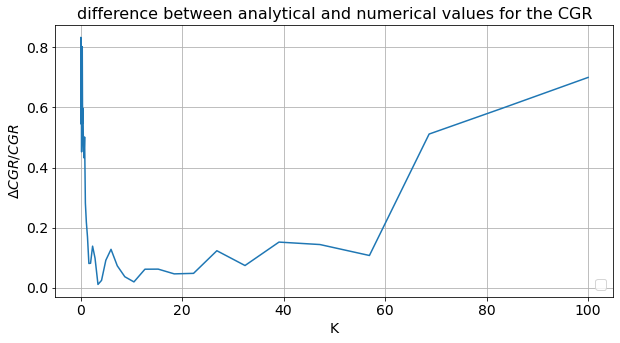

In [11]:
# Here we observe the differences between the CGR for the classical Kicked rotator and the quantum CGR, divided by the quantum CGR
differencesCGR=abs(CGR_Q-CGR_c)/CGR_Q

plt.figure(figsize=(10,5))
# plt.yscale('log')
plt.plot(K,differencesCGR)

plt.legend(loc='lower right', fontsize='14')
plt.xlabel('K', size=14)
plt.ylabel('$\Delta CGR/CGR$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('difference between analytical and numerical values for the CGR', size=16)
plt.grid(True, which="both")
plt.savefig('diff_CGR.png', dpi=100)

No handles with labels found to put in legend.


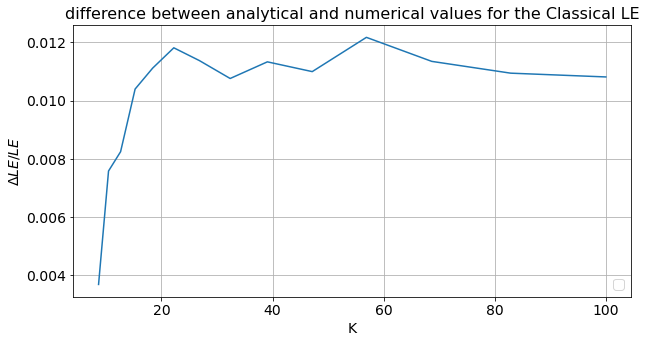

In [14]:
# Here we observe the differences between the numerically computed LE for the classical Kicked rotator and the analitycal behaviour, divided by the analytical behaviour
differencesLE=abs(log(K/2)-lyapCL)/log(K/2)

plt.figure(figsize=(10,5))
# plt.yscale('log')
plt.plot(K[36:],differencesLE[36:])

plt.legend(loc='lower right', fontsize='14')
plt.xlabel('K', size=14)
plt.ylabel('$\Delta LE/LE$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('difference between analytical and numerical values for the Classical LE', size=16)
plt.grid(True, which="both")
plt.savefig('diff_LE_Classical.png', dpi=100)